# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [2]:
!python -m pip install kaggle==1.6.12

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=2372df99919c2a14e328abb4f076216a606365d4fecd6caaf75624e0692ddf7f
  Stored in directory: /home/student/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
!pip install --target=/workspace ucimlrepo numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 65.1 MB/s eta 0:00:0000:0100:01
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 76.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.9/507.9 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.8/346.8 kB 32.4 MB/s eta 0:00:00


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

In [4]:
import json
import requests
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#first, let's pull manually a dataset from Kaggle
life_ex_df = pd.read_csv("data/life_expectancy.csv")
life_ex_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:


# List of indicators to pull from the World Bank API
indicators = {
    "SH.XPD.CHEX.PC.CD": "Health_Expenditure_per_Capita",
    "SH.XPD.CHEX.GD.ZS": "Health_Expenditure_GDP_Percentage",
    "SH.MED.PHYS.ZS": "Physicians_per_1000",
    "SH.MED.BEDS.ZS": "Hospital_Beds_per_1000",
    "NY.GDP.PCAP.CD": "GDP_per_Capita",
    "SE.SCH.LIFE": "Mean_Years_of_Schooling"
}

# Initialize an empty DataFrame
health_df = None

# Loop through each indicator and fetch data separately
for indicator, column_name in indicators.items():
    print(f"Fetching data for {column_name}...")

    # Define the API request URL
    url = f"http://api.worldbank.org/v2/country/all/indicator/{indicator}?format=json&per_page=20000"

    # Fetch data from the API
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Failed to retrieve data for {column_name}. Status Code: {response.status_code}")
        continue

    data = response.json()

    # Check if data exists and is in the correct format
    if len(data) < 2 or not isinstance(data[1], list):
        print(f"No data available for {column_name}.")
        continue

    # Extract relevant information
    records = []
    for entry in data[1]:
        country = entry.get("country", {}).get("value", None)
        year = entry.get("date", None)
        value = entry.get("value", None)
        records.append([country, year, value])

    # Convert to a pandas DataFrame
    df = pd.DataFrame(records, columns=["Country", "Year", column_name])

    # Merge with final DataFrame
    if health_df is None:
        health_df = df
    else:
        health_df = pd.merge(health_df, df, on=["Country", "Year"], how="outer")

# Display the first few rows
if health_df is not None:
    print(health_df.head())
else:
    print("No data retrieved.")


Fetching data for Health_Expenditure_per_Capita...
Fetching data for Health_Expenditure_GDP_Percentage...
Fetching data for Physicians_per_1000...
Fetching data for Hospital_Beds_per_1000...
Fetching data for GDP_per_Capita...
Fetching data for Mean_Years_of_Schooling...
Failed to retrieve data for Mean_Years_of_Schooling. Status Code: 400
       Country  Year  Health_Expenditure_per_Capita  \
0  Afghanistan  1960                            NaN   
1  Afghanistan  1961                            NaN   
2  Afghanistan  1962                            NaN   
3  Afghanistan  1963                            NaN   
4  Afghanistan  1964                            NaN   

   Health_Expenditure_GDP_Percentage  Physicians_per_1000  \
0                                NaN                0.035   
1                                NaN                  NaN   
2                                NaN                  NaN   
3                                NaN                  NaN   
4                     

In [7]:
health_df.head(20)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,1960,NaN,NaN,0.035,0.170627,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,1965,NaN,NaN,0.063,NaN,NaN
6,Afghanistan,1966,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,1967,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,1968,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,1969,NaN,NaN,NaN,NaN,NaN


### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

This project explores the factors influencing life expectancy by analyzing health and economic indicators. Using the WHO Life Expectancy dataset from Kaggle and additional data from the World Bank API, I will examine the impact of healthcare expenditure, medical resources, GDP per capita, and education. Through data wrangling and analysis, the goal is to identify key predictors of life expectancy and global trends in healthcare investment.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Gather data by accessing APIs


Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using the "Downloading files" method from Kaggle.

Dataset variables:

*   Country: Name of the country
*   Year: Year of data collection
*   Status: Developing or developed country classification
*   Life expectancy: Average number of years a newborn is expected to live
*   Adult Mortality: Probability of dying between ages 15-60 per 1,000 population
*   Infant deaths: Number of infant deaths per 1,000 live births
*   Alcohol: Per capita alcohol consumption (liters per person, age 15+)
*   Percentage expenditure: Expenditure on health as a percentage of GDP
*   Hepatitis B: Immunization coverage for Hepatitis B (%)
*   Measles: Number of measles cases reported per year
*   Polio: Immunization coverage for Polio (%)
*   Total expenditure: Total health expenditure as a percentage of GDP
*   Diphtheria: Immunization coverage for Diphtheria (%)
*   HIV/AIDS: Deaths per 1,000 people due to HIV/AIDS
*   GDP: Gross Domestic Product per capita
*   Population: Total population of the country
*   Thinness 1-19 years: Prevalence of thinness in children aged 1-19 years (%)
*   Thinness 5-9 years: Prevalence of thinness in children aged 5-9 years (%)
*   Income composition of resources: Human Development Index (HDI) income component
*   Schooling: Average number of years of schooling

The dataset was manually downloaded from Kaggle as a CSV file and loaded into a Pandas DataFrame using pd.read_csv().

#### Dataset 2

Type: Type: JSON (converted to Pandas DataFrame)

Method: The data was gathered by accessing the World Bank API using Python’s requests library.

Dataset variables:

*   Country: Name of the country
*   Year: Year of observation
*   Health_Expenditure_per_Capita: Per capita health expenditure in USD
*   Health_Expenditure_GDP_Percentage: Health expenditure as a percentage of GDP
*   Physicians_per_1000: Number of physicians per 1,000 people
*   Hospital_Beds_per_1000: Number of hospital beds per 1,000 people
*   GDP_per_Capita: Gross Domestic Product per capita
*   Mean_Years_of_Schooling: Average number of years of schooling

World Bank data was pulled via API.

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [8]:
life_ex_df.to_csv("data/life_expectancy.csv", index=False)
with open("data/world_bank_raw.json", "w") as file:
    json.dump(data, file)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing values

In [9]:
#Instpect the dataframe visually:
# Count missing values per column
life_ex_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
life_ex_df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2847,Vanuatu,2010,Developing,71.0,145.0,0,0.91,471.862653,62.0,0,...,66.0,4.71,65.0,0.1,2965.824340,236295.0,1.5,1.4,0.590,10.8
446,Côte d'Ivoire,2001,Developing,47.8,467.0,65,3.15,0.000000,1.0,5790,...,7.0,4.85,66.0,7.0,NaN,NaN,7.9,7.9,NaN,NaN
685,Cyprus,2003,Developed,78.5,66.0,0,10.62,158.708740,88.0,0,...,98.0,6.83,98.0,0.1,2293.478900,993563.0,0.9,1.0,0.815,13.0
1756,Morocco,2007,Developing,71.4,128.0,21,0.56,157.643145,95.0,2248,...,95.0,5.48,95.0,0.1,2494.353552,31225881.0,6.4,6.3,0.581,10.0
763,Djibouti,2005,Developing,58.6,318.0,2,1.23,12.703259,NaN,298,...,71.0,7.21,71.0,3.9,94.729749,783254.0,5.9,5.8,0.396,4.0
1139,Honduras,2014,Developing,74.5,149.0,3,2.87,345.377634,97.0,0,...,97.0,8.72,97.0,0.3,2242.711912,889216.0,2.1,2.1,0.618,11.4
2647,Tonga,2001,Developing,71.8,157.0,0,1.35,330.100739,91.0,4,...,91.0,5.66,89.0,0.1,1837.977391,98611.0,0.1,0.1,0.674,13.2
596,Comoros,2011,Developing,62.2,241.0,2,0.12,59.659650,83.0,3,...,85.0,6.10,83.0,0.2,829.758688,76569.0,7.0,6.8,0.479,10.6
2888,Viet Nam,2001,Developing,73.6,138.0,32,1.84,0.000000,NaN,12058,...,96.0,5.17,96.0,0.1,NaN,NaN,15.7,16.4,0.576,10.6
799,Ecuador,2002,Developing,73.6,157.0,8,3.88,187.384351,75.0,0,...,88.0,4.62,88.0,0.3,2183.966796,13726.0,1.5,1.4,0.675,12.5


In [11]:
#FILL IN - Inspecting the dataframe programmatically
# Count missing values per column
missing_values = life_ex_df.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [12]:
life_ex_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Issue and justification**

Missing values in key health indicators can bias results and reduce statistical power. Some missing values, like for vaccines (Hepatitis B, Polio & Diphtheria Vaccination), may be due to country-specific tracking issues, while others (Alcohol consumption) could be due to data collection limitations or cultural factors. Also, missing important key dependent variable, such as Life expectancy, and Adult Mortality, both missing 10 values, can significantly impact analysis.  We need to decide whether to impute these values or remove affected rows/countries based on missing data percentage.

### Quality Issue 2: Missing Values in Key Indicators

In [13]:
#FILL IN - Inspecting the dataframe visually
health_df.head()

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,1960,NaN,NaN,0.035,0.170627,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN


In [14]:
health_df.sample(10)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
12682,Pre-demographic dividend,1970,NaN,NaN,NaN,1.369752,195.390367
1206,Bangladesh,2014,30.295795,2.279152,0.484,0.600000,1094.461997
7542,Israel,2014,2816.000000,7.050000,3.457,3.210000,38230.495405
16900,Zambia,1964,NaN,NaN,NaN,NaN,229.979246
13775,Slovenia,1975,NaN,NaN,NaN,NaN,NaN
12618,Post-demographic dividend,1970,NaN,NaN,NaN,9.437083,2785.607611
995,Azerbaijan,1995,NaN,NaN,3.703,10.020000,314.558019
4192,East Asia & Pacific (excluding high income),1992,NaN,NaN,NaN,2.275195,492.097416
9606,Malaysia,1966,NaN,NaN,NaN,NaN,338.570121
9088,Lithuania,1960,NaN,NaN,NaN,NaN,NaN


In [15]:
#FILL IN - Inspecting the dataframe programmatically
health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            17024 non-null  object 
 1   Year                               17024 non-null  object 
 2   Health_Expenditure_per_Capita      5166 non-null   float64
 3   Health_Expenditure_GDP_Percentage  5167 non-null   float64
 4   Physicians_per_1000                5317 non-null   float64
 5   Hospital_Beds_per_1000             5864 non-null   float64
 6   GDP_per_Capita                     14312 non-null  float64
dtypes: float64(5), object(2)
memory usage: 931.1+ KB


In [16]:
missing_values_wb = health_df.isnull().sum()
print(missing_values_wb[missing_values_wb > 0])

Health_Expenditure_per_Capita        11858
Health_Expenditure_GDP_Percentage    11857
Physicians_per_1000                  11707
Hospital_Beds_per_1000               11160
GDP_per_Capita                        2712
dtype: int64


In [17]:
health_df.describe()

,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
count,5166.000000,5167.000000,5317.000000,5864.000000,14312.000000
mean,927.202083,6.200575,1.694175,4.064631,8472.910984
std,1670.610344,2.790524,1.437945,3.244257,17119.110058
min,4.000000,1.107200,0.004000,0.100000,11.801322
25%,63.779344,4.246770,0.376000,1.640000,570.074056
50%,246.729577,5.443990,1.400000,3.030000,1879.957137
75%,799.258132,7.790887,2.741000,5.740000,7813.710347
max,12473.791016,24.283052,9.429000,40.315456,256580.515123


Issue and justification: Many missing values in key indicators such as Physicians per 1,000 people, Hospital Beds per 1,000 people, and Mean Years of Schooling. Some years/countries might not have reported data.

The World Bank dataset contains indicators from different sources, and some countries might not report all data every year. This can lead to gaps in the dataset, affecting our analysis. We need to decide whether to impute missing values, drop affected rows/columns, or find alternative data sources.

### Tidiness Issue 1: Extra Spaces

In [18]:
#FILL IN - Inspecting the dataframe visually
life_ex_df.shape

(2938, 22)

In [19]:
life_ex_df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [20]:
life_ex_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
#FILL IN - Inspecting the dataframe programmatically
life_ex_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Issue and justification: Some column names contain extra spaces (e.g., " thinness 1-19 years", " thinness 5-9 years"), which can cause inconsistencies when accessing or merging data. Additionally, certain variables may be better structured for analysis.

Justification: Extra spaces in column names can lead to errors when calling columns, performing merges, or writing functions. Ensuring proper column naming improves data consistency, readability, and ease of access.

### Tidiness Issue 2: Inconsistent Data Types

In [22]:
#FILL IN - Inspecting the dataframe visually

health_df.shape

(17024, 7)

In [23]:
health_df.columns

Index(['Country', 'Year', 'Health_Expenditure_per_Capita',
       'Health_Expenditure_GDP_Percentage', 'Physicians_per_1000',
       'Hospital_Beds_per_1000', 'GDP_per_Capita'],
      dtype='object')

In [24]:
health_df.dtypes

Country                               object
Year                                  object
Health_Expenditure_per_Capita        float64
Health_Expenditure_GDP_Percentage    float64
Physicians_per_1000                  float64
Hospital_Beds_per_1000               float64
GDP_per_Capita                       float64
dtype: object

In [25]:
#FILL IN - Inspecting the dataframe programmatically
health_df.head(5)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,1960,NaN,NaN,0.035,0.170627,NaN
1,Afghanistan,1961,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1962,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1963,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1964,NaN,NaN,NaN,NaN,NaN


In [26]:
health_df.sample(5)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
13121,San Marino,1961,NaN,NaN,NaN,NaN,NaN
7254,"Iran, Islamic Rep.",1982,NaN,NaN,NaN,NaN,2844.876114
10295,Middle East & North Africa (IDA & IBRD countries),2015,235.649769,5.986886,NaN,1.481421,3809.846682
2090,Bulgaria,2002,148.000000,7.080000,3.472,6.400000,2092.982886
14519,St. Lucia,2015,464.574432,4.514199,NaN,1.420000,10334.922556


Issue and justification: The health_df dataset has a difference data type in the 'year' column when we compare with the life_ex dataset. This can cause merging errors and data manipulation issues.

This structure makes analysis and visualization harder.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [27]:
# Create copies of the original datasets
life_ex_clean = life_ex_df.copy()
health_clean = health_df.copy()

### **Quality Issue 1: Missing values**

In [28]:
# Remove any leading/trailing spaces from column names
life_ex_clean.columns = life_ex_clean.columns.str.strip()

# Verify column names again
life_ex_clean.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [29]:
# Drop rows where Life expectancy or Adult Mortality is missing
life_ex_clean = life_ex_clean.dropna(subset=["Life expectancy", "Adult Mortality"])

In [30]:
# Convert numeric columns properly before interpolating
life_ex_clean = life_ex_clean.infer_objects(copy=False)
# Now apply interpolation
life_ex_clean = life_ex_clean.interpolate()

/tmp/ipykernel_13/3999863641.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  life_ex_clean = life_ex_clean.interpolate()


In [31]:
# Fill remaining missing values with the median of each column that has numbers on it
life_ex_clean = life_ex_clean.fillna(life_ex_clean.select_dtypes(include=['number']).median())

In [32]:
#Validate the cleaning was successful
# Check if there are any remaining missing values
life_ex_clean.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [33]:
# Verify that key indicators are no longer missing
life_ex_clean[["Life expectancy", "Adult Mortality"]].isnull().sum()

Life expectancy    0
Adult Mortality    0
dtype: int64

In [34]:
life_ex_clean.duplicated().sum()

0

Justification: 

We applied a series of data cleaning steps to resolve missing values and ensure sonsistency in our dataset. First, some column names contained trailing spaces, which could cause issues when accessing columns programmatically. Stripping spaces ensures consistent referencing of column names and prevents unexpected errors. Second, dropping rows where "Life expectancy" and "Adult Mortality" are missing, since both indicators are critical for our analysis, and only 10 rows were affected, causing minimal impact on the overall dataset.
Third, ensuring numeric columns are properly recognized, using .infer_objects(copy=false). This step was necessary to avoid errors when filling missing values. 
Forth: Interpolating missing values for numeric trends, since many health indicators follow a natural progression over time, making linear interpolation a suitable method for filling missing values. This ensures smooth transitions in numerical trends, without introducing inconsistencies.
Fifth: For any remaining missing values, I replaced them with the median of each column. The median is less sensitive to outliers than the mean, making it a more robust imputation method. 
Sixth: Validation to ensure successful cleaning, using .isnull().sum() to sum all the null values.

### **Quality Issue 2: Missing Values in Key Indicators**

In [35]:
#FILL IN - Apply the cleaning strategy
#identify missing values
health_df.isnull().sum()

Country                                  0
Year                                     0
Health_Expenditure_per_Capita        11858
Health_Expenditure_GDP_Percentage    11857
Physicians_per_1000                  11707
Hospital_Beds_per_1000               11160
GDP_per_Capita                        2712
dtype: int64

In [36]:
health_clean = health_clean.infer_objects(copy=False)

In [37]:
health_clean = health_clean.interpolate()

/tmp/ipykernel_13/563381746.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  health_clean = health_clean.interpolate()


In [38]:
health_clean = health_clean.fillna(health_clean.select_dtypes(include=['number']).median())


In [39]:
#FILL IN - Validate the cleaning was successful
health_clean.isnull().sum()

Country                              0
Year                                 0
Health_Expenditure_per_Capita        0
Health_Expenditure_GDP_Percentage    0
Physicians_per_1000                  0
Hospital_Beds_per_1000               0
GDP_per_Capita                       0
dtype: int64

In [40]:
health_clean[["Health_Expenditure_per_Capita", "GDP_per_Capita"]].isnull().sum()

Health_Expenditure_per_Capita    0
GDP_per_Capita                   0
dtype: int64

In [41]:
health_clean.head(5)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,1960,333.403061,5.762612,0.0350,0.170627,2300.107406
1,Afghanistan,1961,333.403061,5.762612,0.0406,0.173464,2300.107406
2,Afghanistan,1962,333.403061,5.762612,0.0462,0.176302,2300.107406
3,Afghanistan,1963,333.403061,5.762612,0.0518,0.179139,2300.107406
4,Afghanistan,1964,333.403061,5.762612,0.0574,0.181976,2300.107406


In [42]:
health_clean.sample(5)

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
16416,Uzbekistan,1992,329.944449,5.908690,3.341000,10.754100,602.920526
2342,Cambodia,1998,30.391847,6.555059,0.147000,1.001482,258.780953
17000,Zimbabwe,2000,93.926823,9.749108,0.127000,2.066438,562.556900
4677,Ethiopia,1965,228.826932,6.538935,0.014000,0.289717,88.850029
6384,Haiti,2008,40.258106,3.757221,0.163538,1.086667,1094.660584


Justification: 
Why drop Country and Year missing values?
These are crucial identifiers; without them, the data loses meaning.

Why use interpolation?
It helps estimate missing values based on trends rather than arbitrarily filling them.

Why use median for the remaining missing values?
Median is resistant to outliers and provides a more balanced estimate than the mean.

### Tidiness Issue 1: Removing Extra Spaces

In [43]:
#FILL IN - Apply the cleaning strategy

life_ex_clean.columns = life_ex_clean.columns.str.strip()

In [44]:
#FILL IN - Validate the cleaning was successful
life_ex_clean.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Justification: 

Why remove extra spaces?
Column names with spaces can cause errors in function calls, column indexing, and merges.
Why use .str.strip()?
It efficiently removes leading and trailing spaces without modifying valid column names.
How does this improve tidiness?
It ensures consistency and accessibility across the dataset

### **Tidiness Issue 2: Inconsistent Data Types**

In [45]:
# Convert 'Year' to integer in both datasets to ensure consistency

life_ex_clean["Year"] = life_ex_clean["Year"].astype(int)
health_clean["Year"] = health_clean["Year"].astype(int)

In [46]:
print(life_ex_clean["Year"].dtypes)
print(health_clean["Year"].dtypes)

int64
int64


In [47]:
#FILL IN - Validate the cleaning was successful
health_clean.head()

,Country,Year,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,1960,333.403061,5.762612,0.0350,0.170627,2300.107406
1,Afghanistan,1961,333.403061,5.762612,0.0406,0.173464,2300.107406
2,Afghanistan,1962,333.403061,5.762612,0.0462,0.176302,2300.107406
3,Afghanistan,1963,333.403061,5.762612,0.0518,0.179139,2300.107406
4,Afghanistan,1964,333.403061,5.762612,0.0574,0.181976,2300.107406


Justification: Inconsistent data types across datasets can cause merging errors and data manipulation issues. Ensuring a uniform format for key variables (like "Year") improves data integrity and facilitates smoother analysis.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [48]:
#FILL IN - Remove unnecessary variables and combine datasets

columns_to_drop = ["Measles", "Polio", "Diphtheria", "Hepatitis B"]
life_ex_clean = life_ex_clean.drop(columns=columns_to_drop)

In [49]:
"Updated shape:", life_ex_clean.shape

('Updated shape:', (2928, 18))

In [50]:
"Remaining columns:", life_ex_clean.columns

('Remaining columns:',
 Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
        'infant deaths', 'Alcohol', 'percentage expenditure', 'BMI',
        'under-five deaths', 'Total expenditure', 'HIV/AIDS', 'GDP',
        'Population', 'thinness  1-19 years', 'thinness 5-9 years',
        'Income composition of resources', 'Schooling'],
       dtype='object'))

In [51]:
life_ex_clean.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,18.6,86,8.18,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,16.7,102,9.20,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,16.2,106,9.42,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,15.7,110,8.33,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,15.2,113,6.73,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,14.7,116,7.43,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


#### Combine Datasets

In [52]:
merged_df = life_ex_clean.merge(health_clean, on=["Country", "Year"], how="inner")

In [53]:
merged_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,BMI,under-five deaths,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Health_Expenditure_per_Capita,Health_Expenditure_GDP_Percentage,Physicians_per_1000,Hospital_Beds_per_1000,GDP_per_Capita
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,19.1,83,...,33736494.0,17.2,17.3,0.479,10.1,60.058540,10.105348,0.291,0.44,565.569730
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,18.6,86,...,327582.0,17.5,17.5,0.476,10.0,60.189579,9.528878,0.304,0.46,625.054942
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,18.1,89,...,31731688.0,17.7,17.7,0.470,9.9,56.305542,8.805964,0.291,0.46,637.087099
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,17.6,93,...,3696958.0,17.9,18.0,0.463,9.8,52.613541,7.897169,0.247,0.47,651.417134
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,17.2,97,...,2978599.0,18.2,18.2,0.454,9.5,52.363049,8.561908,0.259,0.45,606.694676


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [54]:
#FILL IN - saving data
# Save raw datasets (before cleaning)
life_ex_df.to_csv("raw_life_expectancy.csv", index=False)
health_df.to_csv("raw_health_indicators.csv", index=False)

# Save cleaned datasets (after cleaning)
life_ex_clean.to_csv("cleaned_life_expectancy.csv", index=False)
health_clean.to_csv("cleaned_health_indicators.csv", index=False)

# Save final merged dataset
merged_df.to_csv("final_merged_dataset.csv", index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

##### How Do economic factors (GPD, income composition) affect life expectancy?

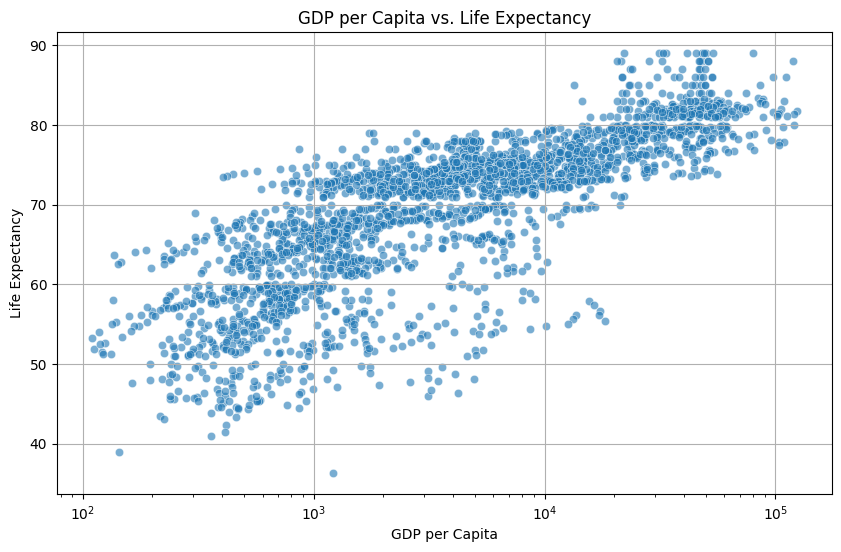

In [55]:
#Visual 1 - FILL IN

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="GDP_per_Capita", y="Life expectancy", alpha=0.6)
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("GDP per Capita vs. Life Expectancy")
plt.xscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()

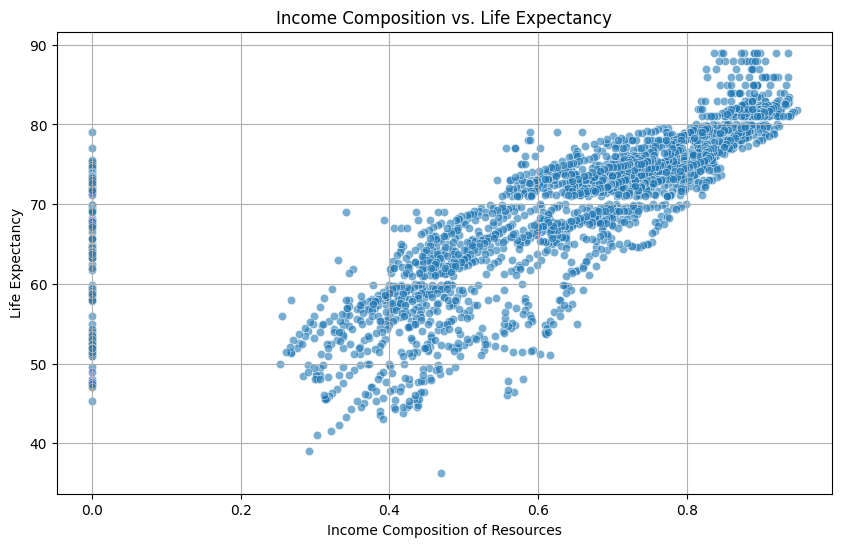

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Income composition of resources", y="Life expectancy", alpha=0.6)
plt.xlabel("Income Composition of Resources")
plt.ylabel("Life Expectancy")
plt.title("Income Composition vs. Life Expectancy")
plt.grid(True)
plt.show()

*Answer to research question:* Show correlation between economic factors and life expectancy.
We can infer a correlation between higher healthcare spending and higher GDP per capita, as wealthier countries typically invest more in healthcare, which, in turn, influences life expectancy. Thus, economic factors are positively associated with life expectancy. Wealthier countries generally afford better healthcare, sanitation, nutrition, and living conditions, all of which contribute to increased longevity.

##### What is the relationship between healthcare expenditure and life expectancy?


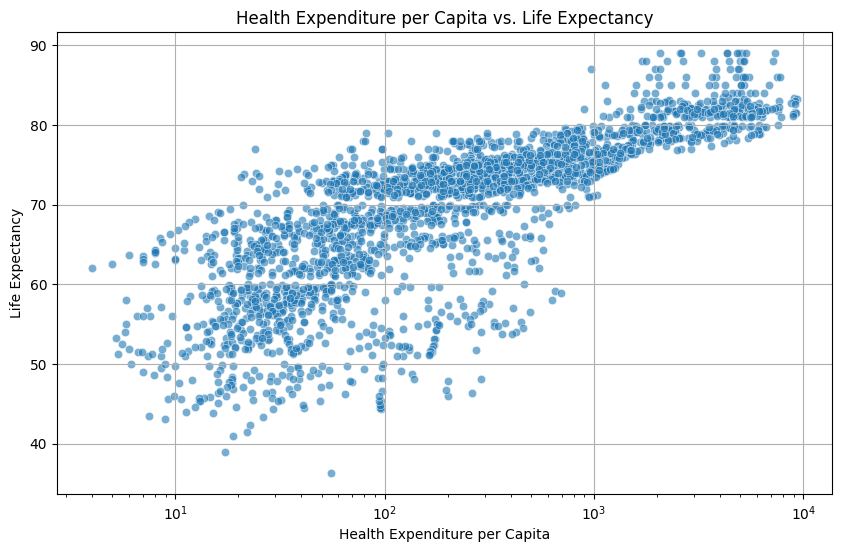

In [57]:
#Visual 2 - FILL IN

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x="Health_Expenditure_per_Capita", y="Life expectancy", alpha=0.6)
plt.xlabel("Health Expenditure per Capita")
plt.ylabel("Life Expectancy")
plt.title("Health Expenditure per Capita vs. Life Expectancy")
plt.xscale("log")  # Log scale for better visualization
plt.grid(True)
plt.show()

Given the established relationship between health expenditure and life expectancy, the following graph illustrates the life expectancy of the top three countries with the highest health expenditures, and the top three countries with the lowest health expenditures, along with their corresponding life expectancies.

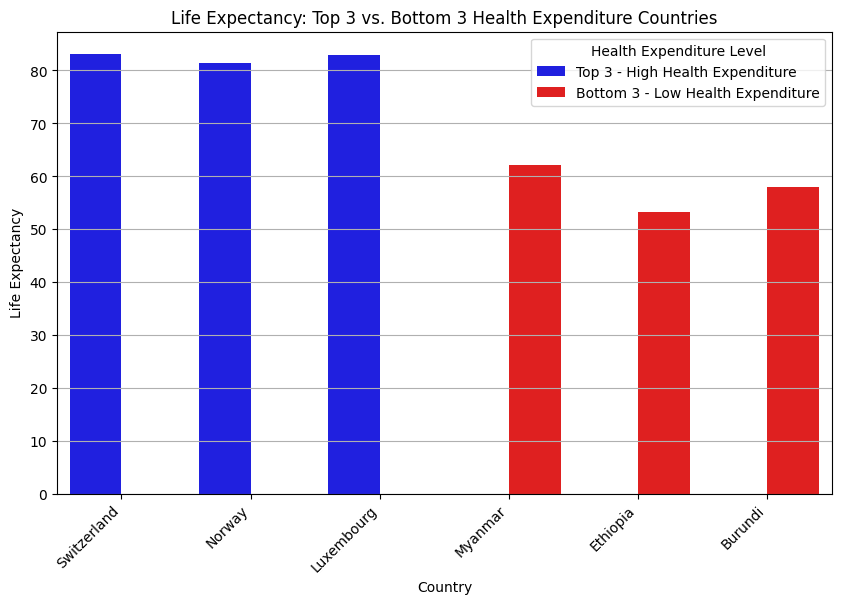

In [58]:
# drop missing values in health expenditure
df_cleaned = merged_df.dropna(subset=["Health_Expenditure_per_Capita"]).copy()

# standardize country names
df_cleaned["Country"] = df_cleaned["Country"].str.strip().str.lower()  # convert to lowercase & remove spaces

# function to get unique top/bottom N countries
def get_unique_top_bottom(df, column, n=3, ascending=False):
    selected_countries = set() # a set to track the countries selected and avoid duplicates
    unique_list = [] #to store the unique country rows

    # sort the dataset
    sorted_df = df.sort_values(column, ascending=ascending)

    # iterate and select only unique country names
    for _, row in sorted_df.iterrows():
        country = row["Country"]
        if country not in selected_countries:
            unique_list.append(row)
            selected_countries.add(country)
        if len(unique_list) == n:  # stop when we have enough unique countries
            break

    return pd.DataFrame(unique_list)

# get top 3 countries with highest health expenditure
top3_expenditure = get_unique_top_bottom(df_cleaned, "Health_Expenditure_per_Capita", n=3, ascending=False)
top3_expenditure["Category"] = "Top 3 - High Health Expenditure"

# get bottom 3 countries with lowest health expenditure
bottom3_expenditure = get_unique_top_bottom(df_cleaned, "Health_Expenditure_per_Capita", n=3, ascending=True)
bottom3_expenditure["Category"] = "Bottom 3 - Low Health Expenditure"

# merge both datasets
compare_df = pd.concat([top3_expenditure, bottom3_expenditure])

# convert back to title case for better readability
compare_df["Country"] = compare_df["Country"].str.title()



plt.figure(figsize=(10,6))
sns.barplot(
    data=compare_df, 
    x="Country", 
    y="Life expectancy", 
    hue="Category", 
    palette=["blue", "red"]
)


plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy: Top 3 vs. Bottom 3 Health Expenditure Countries")
plt.legend(title="Health Expenditure Level")
plt.grid(axis="y")


plt.show()

*Answer to research question:*
The graphs clearly show that countries that spend more on healthcare tend to have longer life expectancies.
Switzerland and Norway (high healthcare expenditure) have an average life expectancy above 80 years. On the other hand, Myanmar and Ethiopia (low healthcare expenditure) have an average life expectancy between 52 and 62 years. 

The trend supports the idea that greater investment in healthcare leads to better health outcomes, including increased longevity. However, other factors like education, infrastructure and disease burden also play a role. 

##### Is there a difference in life expectancy between developing and developed countries?

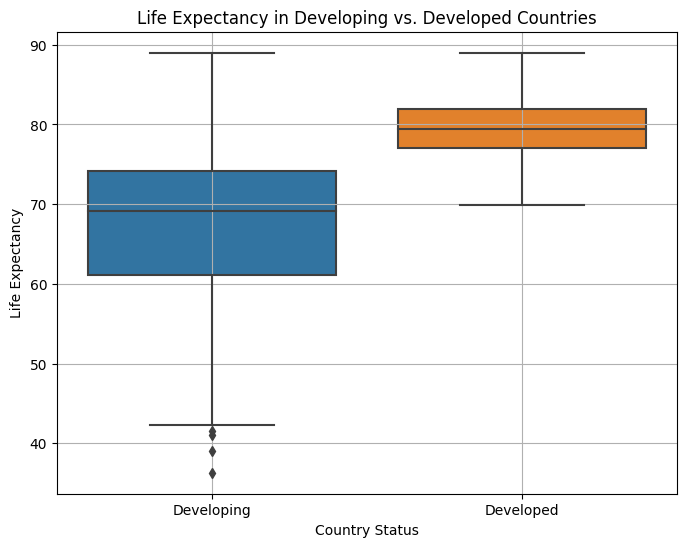

In [59]:
#Visual 3 - FILL IN
# Box plot of Life Expectancy for Developed vs. Developing Countries
plt.figure(figsize=(8,6))
sns.boxplot(data=merged_df, x="Status", y="Life expectancy")
plt.xlabel("Country Status")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy in Developing vs. Developed Countries")
plt.grid(True)
plt.show()

*Answer to research question:* Yes, there is a significant difference. Developed countries, such as Switzerland and Norway, have a much higher life expectancy, while developing countries, like Myanmar and Ethiopia, have a significantly lower life expectancy.

The gap suggests that developed countries benefit from better healthcare infrastructure, medical advancements, nutrition, and overall living conditions, leading to a higher life expectancy.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time, I would further standardize the data by removing duplicates and aggregating rows based on maximum values to improve comparability and visualization. Additionally, I would explore the impact of healthcare access, sanitation, nutrition, and alcohol consumption on life expectancy. Investigating regional disparities and trends over time could also provide deeper insights into the factors influencing longevity.